In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ames-housing-dataset/AmesHousing.csv


In [2]:
Housedf = pd.read_csv("../input/ames-housing-dataset/AmesHousing.csv")
Housedf.shape

(2930, 82)

In [3]:
Housedf.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
Housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
#We will attempt to get the most correlated features with our target "SalePrice" and plot againt this target to check for the presence of outliers
Housedf.corr()["SalePrice"].sort_values(ascending = False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0

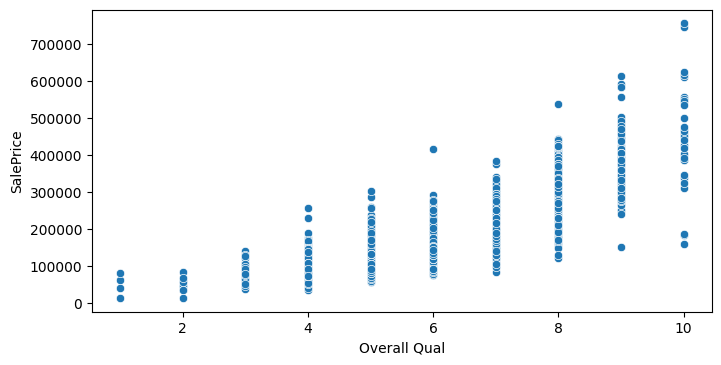

In [6]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.scatterplot(data = Housedf, x = "Overall Qual", y = "SalePrice");
#plt.scatter(data = Housedf, x= "Overall Qual", y ="SalePrice")

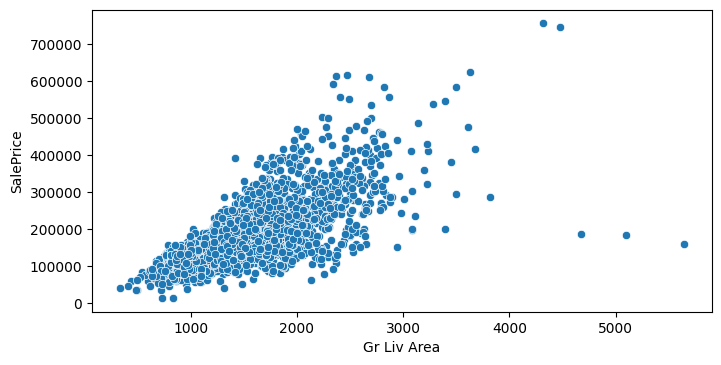

In [7]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.scatterplot(data = Housedf, x = "Gr Liv Area", y = "SalePrice");

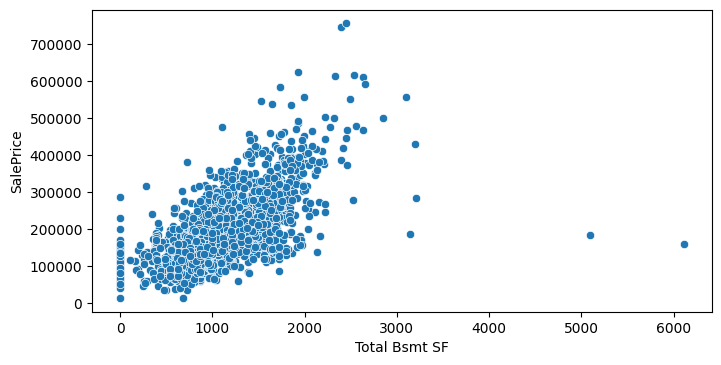

In [8]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.scatterplot(data = Housedf, x = "Total Bsmt SF", y = "SalePrice");

In [9]:
#extract outliers
Housedf[(Housedf["Overall Qual"]>8) & (Housedf["Gr Liv Area"]>4000) & (Housedf["SalePrice"]<300000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [10]:
#get outliers indexes
drop_index=Housedf[(Housedf["Overall Qual"]>8) & (Housedf["Gr Liv Area"]>4000) & (Housedf["SalePrice"]<300000)].index

In [11]:
#drop those records
Housedf=Housedf.drop(drop_index)
Housedf.shape

(2927, 82)

**Dealing with Null Values**

In [12]:
#Drop Order & PID columns (they have  got no bussiness meaning)
Housedf=Housedf.drop(['Order','PID'],axis=1)
Housedf.shape

(2927, 80)

In [13]:
#Get percentage of Nulls in each column
def NULL_Percentage(df):
    Null_perc= pd.DataFrame(df.isna().sum().sort_values(ascending = False))
    Null_perc.columns=['null_count']
    Null_perc['null%']= (Null_perc['null_count']/df.shape[0])*100
    Null_perc=Null_perc[Null_perc["null_count"]>0]
    return Null_perc

In [14]:
nan_percent=NULL_Percentage(Housedf)
nan_percent

,null_count,null%
Pool QC,2915,99.590024
Misc Feature,2822,96.412709
Alley,2729,93.235395
Fence,2355,80.457807
Fireplace Qu,1422,48.582166
Lot Frontage,490,16.740690
Garage Cond,159,5.432183
Garage Finish,159,5.432183
Garage Yr Blt,159,5.432183
Garage Qual,159,5.432183


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Pool QC'),
  Text(1, 0, 'Misc Feature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'Fireplace Qu'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Garage Cond'),
  Text(7, 0, 'Garage Finish'),
  Text(8, 0, 'Garage Yr Blt'),
  Text(9, 0, 'Garage Qual'),
  Text(10, 0, 'Garage Type'),
  Text(11, 0, 'Bsmt Exposure'),
  Text(12, 0, 'BsmtFin Type 2'),
  Text(13, 0, 'Bsmt Cond'),
  Text(14, 0, 'Bsmt Qual'),
  Text(15, 0, 'BsmtFin Type 1'),
  Text(16, 0, 'Mas Vnr Area'),
  Text(17, 0, 'Mas Vnr Type'),
  Text(18, 0, 'Bsmt Full Bath'),
  Text(19, 0, 'Bsmt Half Bath'),
  Text(20, 0, 'Bsmt Unf SF'),
  Text(21, 0, 'Garage Cars'),
  Text(22, 0, 'Electrical'),
  Text(23, 0, 'Total Bsmt SF'),
  Text(24, 0, 'BsmtFin SF 1'),
  Text(25, 0, 'Garage Area'),
  Text(26, 0, 'BsmtFin SF 2')])

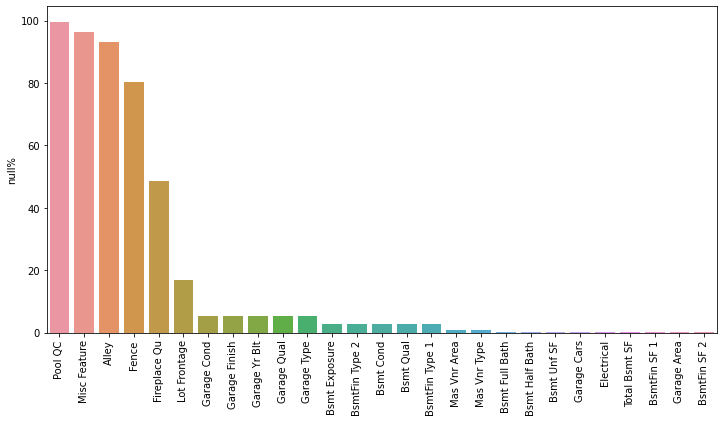

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent['null%'])
plt.xticks(rotation=90)

In [16]:
#handling null values (Options: drop null records for this column - fill string columns with None - Fill numeric columns with 0 - drop the column)

#drop null records for this specefic columns
Housedf= Housedf.dropna(axis=0, subset=['Electrical', 'Garage Area'])

#Fill numeric columns with 0
bsmt_num_cols= ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF' ,'Bsmt Full Bath', 'Bsmt Half Bath','Mas Vnr Area','Garage Yr Blt']
Housedf[bsmt_num_cols]=Housedf[bsmt_num_cols].fillna(0)

#fill string columns with None
bsmt_str_cols= ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2' , 'Mas Vnr Type','Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond','Fireplace Qu']
Housedf[bsmt_str_cols]= Housedf[bsmt_str_cols].fillna('None')

#drop the column
Housedf= Housedf.drop(['Fence', 'Alley', 'Misc Feature','Pool QC'], axis=1)

(array([0]), [Text(0, 0, 'Lot Frontage')])

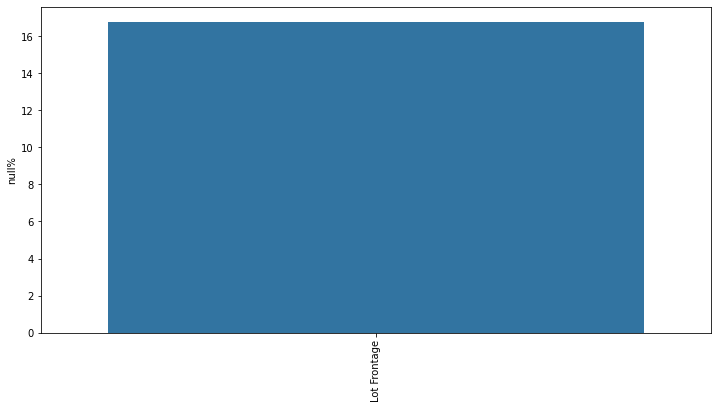

In [17]:
nan_percent=NULL_Percentage(Housedf)
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent['null%'])
plt.xticks(rotation=90)

In [18]:
#we are going to fill the null values within this column with the mean value of the corresponding neighborhood
Housedf['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [19]:
Housedf.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [20]:
Housedf['Lot Frontage']=Housedf.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

(array([0]), [Text(0, 0, 'Lot Frontage')])

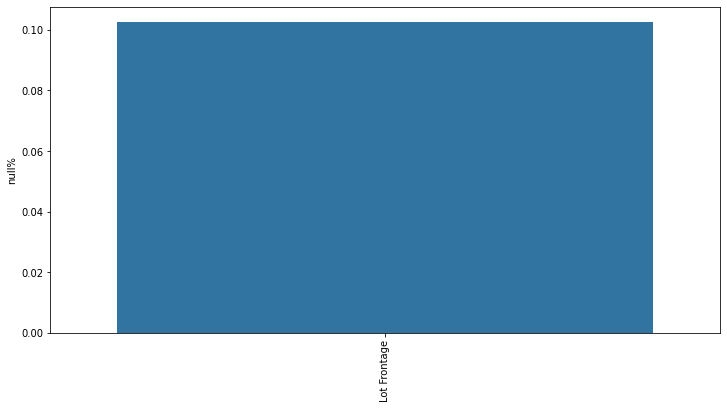

In [21]:
nan_percent=NULL_Percentage(Housedf)
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent['null%'])
plt.xticks(rotation=90)

In [22]:
#it turns out there are neighborhood for which all corresponding 'Lot Frontage' values are Null. we will fill those with zeros

#Housedf[ (Housedf['Neighborhood']=='GrnHill') or (Housedf['Neighborhood']=='Landmrk') ]
Housedf.loc[ (Housedf['Neighborhood'] == 'Landmrk') | (Housedf['Neighborhood'] == 'GrnHill') ]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2256,120,RM,NaN,9763,Pave,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,1998.0,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,0,9,2007,WD,Normal,330000
2788,160,RH,NaN,3612,Pave,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,1320,0.0,0.0,2,1,3,1,TA,5,Typ,0,None,Detchd,1993.0,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,0,0,6,2006,WD,Normal,137000
2892,120,RM,NaN,8239,Pave,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,1295,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1986.0,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,0,0,0,11,2006,WD,Normal,230000


In [23]:
Housedf['Lot Frontage']= Housedf['Lot Frontage'].fillna(0)

In [24]:
#ALl null values are dealt with
nan_percent=NULL_Percentage(Housedf)
nan_percent

,null_count,null%


In [25]:
Housedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   int64  
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Lot Shape        2925 non-null   object 
 6   Land Contour     2925 non-null   object 
 7   Utilities        2925 non-null   object 
 8   Lot Config       2925 non-null   object 
 9   Land Slope       2925 non-null   object 
 10  Neighborhood     2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built    

In [26]:
#Now we prepare our Df to be introduced to the regression model. We need to one-hot-encode the categorical columns

Housedf['MS SubClass']= Housedf['MS SubClass'].apply(str)

#split the DF into numeric and object Dataframes
Housedf_num= Housedf.select_dtypes(exclude='object')
Housedf_str= Housedf.select_dtypes(include='object')

#encode the object columns
Housedf_str= pd.get_dummies(Housedf_str, drop_first=True)
print(Housedf_str.shape)

#concat both dataftams back
Final_df= pd.concat([Housedf_num, Housedf_str], axis=1)

(2925, 238)


In [27]:
Final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_None,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_None,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_None,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_None,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_None,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_None,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_At

In [28]:
X= Final_df.drop('SalePrice',axis=1)
y= Final_df['SalePrice']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [30]:
#Model 1: Linear Regression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

In [35]:
Residuals = pd.DataFrame(y_test - y_pred)
Residuals.head()

,SalePrice
1826,16024.822184
891,-10382.288931
1796,25130.830198
56,-10865.165404
2852,-7258.290096


In [36]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,1.586104e+04
MSE,5.917520e+08
RMSE,2.432595e+04


In [44]:
#Model 2: Random Forrest
model2= RandomForestRegressor(n_estimators = 100, random_state = 0)
model2.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [46]:
y_pred2 = model2.predict(X_test)

In [47]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test, y_pred2)
MSE= metrics.mean_squared_error(y_test, y_pred2)
RMSE= np.sqrt(MSE)
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,1.623951e+04
MSE,6.793510e+08
RMSE,2.606436e+04
